<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Data-Mining/blob/main/Data%20Mining%20Assignment%204/Question%201/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Singular Value Decomposition

In this notebook I have used singular value decomposition for dimensionality reduction if a fruit recognition dataset. The data set consists of 5 features, which are reduced to 2 using SVD which then helps identify the target(label) - orange or grapefruit.

The attributes in the dataset are:
- diameter 
- weight 
- red 
- green 
- blue


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import sys
import matplotlib.animation as animation
from IPython.display import HTML

import cv2

Eigenvalues and eigenvectors are evaluated(A*A) using numpy library to get singular values. These values are then sorted(V), and consider non-zero singular values. Then U is calculated using A, V and sigma

In [79]:
def svd(A, tol=1e-5):
    #singular values and right singular vectors coming from eigenvalues and eigenvectors of A' x A
    eigs, V = linalg.eig(A.T.dot(A))

    #singular values are the square root of the eigenvalues
    sing_vals = np.sqrt(eigs)

    #sort both sigular values and right singular vector
    idx = np.argsort(sing_vals)

    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]

    #remove zero singular values below tol
    sing_vals_trunc = sing_vals[sing_vals>tol]
    V = V[:, sing_vals>tol]

    #is not necessary to store the entire sigma matrix, so only the diagonal is returned
    sigma = sing_vals_trunc

    #evaluate U matrix
    U = A @ V /sing_vals_trunc
    
    return U.real, sigma.real, V.T.real

Here the first k relevant values are considered.

In [80]:
def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

In [59]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%202/DataMining_Datasets/citrus.csv")
data.keys()

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [60]:
data['name'].replace(['orange', 'grapefruit'],
                        [0, 1], inplace=True)

In [61]:
feature_names = data.columns[1:6]
feature_names
#data.columns = feature_names
data["labels"] = data.name

In [62]:
data

,name,diameter,weight,red,green,blue,labels
0,0,2.96,86.76,172,85,2,0
1,0,3.91,88.05,166,78,3,0
2,0,4.42,95.17,156,81,2,0
3,0,4.47,95.60,163,81,4,0
4,0,4.48,95.76,161,72,9,0
...,...,...,...,...,...,...,...
9995,1,15.35,253.89,149,77,20,1
9996,1,15.41,254.67,148,68,7,1
9997,1,15.59,256.50,168,82,20,1
9998,1,15.92,260.14,142,72,11,1


In [63]:
feature_names

Index(['diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [64]:
data["labels"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: labels, Length: 10000, dtype: int64

In [65]:
def custom_pairplot(data, feature_names, labels):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(left = 0, right=1.5, bottom=0, top=1.5)
    n_features = len(feature_names)
    
    for i in range(len(feature_names)):
        for j in range(len(feature_names)):
            plt.subplot(n_features, n_features, i*n_features+j+1)
            if i==j:
                sns.violinplot(data=data, x=labels, y=feature_names[i])
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], c=data[labels])
                plt.xlabel(feature_names[i])
                plt.ylabel(feature_names[j])

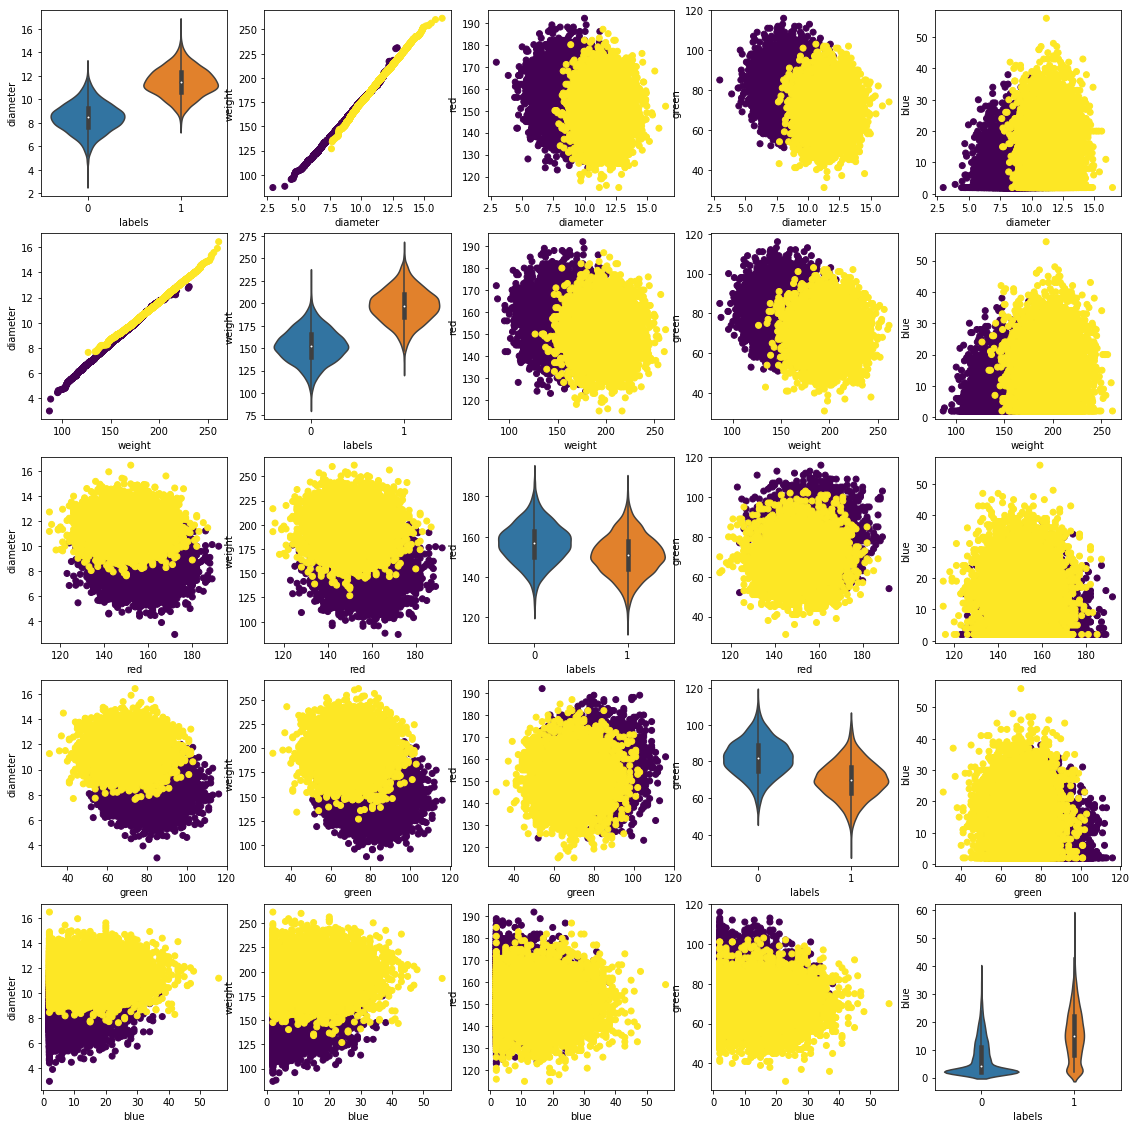

In [66]:
custom_pairplot(data, feature_names=feature_names, labels="labels")

Taking top 2 features for SVD

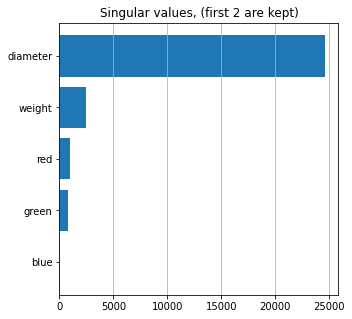

In [90]:
k = 2

A = data[feature_names].values

U, S, Vt = svd(A)
U_trunc, S_trunc, Vt_trunc = truncate(U, S, Vt, k)

trunc_A = U_trunc @ np.diag(S_trunc)
reduced_data = pd.DataFrame(trunc_A)
plt.figure(figsize=(5, 5))
plt.barh(feature_names[::-1], S[::-1])
plt.title(f"Singular values, (first {k} are kept)")
plt.gca().xaxis.grid(True)

Taking 2 features here, which is able to clearly separate the two classes in the target label

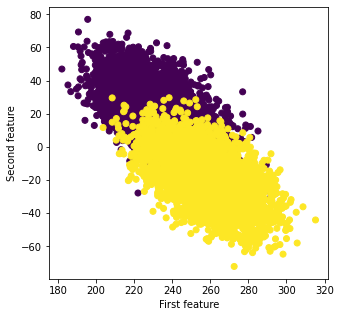

In [91]:
plt.figure(figsize=(5, 5))
plt.scatter(reduced_data[0], reduced_data[1], c = data.name)
plt.xlabel("First feature")
plt.ylabel("Second feature");